In [1]:
using PyPlot

In [2]:
using Jacobi

In [173]:
remap(x,a,b) = ((1-x).*a + (1+x).*b)/2
remap(x,ab) = ((1-x).*ab[1] + (1+x).*ab[2])/2
dremap(x,a,b) = (b-a)/2
dremap(lim)   = (lim[2] - lim[1])/2

methods(dremap)

# 2 methods for generic function "dremap":
dremap(lim) at In[173]:4
dremap(x, a, b) at In[173]:3

In [174]:
function  ϕ_matrix(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = zglj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end 

ϕ_matrix (generic function with 1 method)

In [175]:
function map_matrix(Nel)
    nos = zglj(Nel+1)
    matrix = zeros(Nel,2)
    matrix[1,1],matrix[1,2]=1,2
    for i in 2:Nel
        matrix[i,1] = i
        matrix[i,2] = i + 1
    end
    return round(Int64,matrix)
end

map_matrix (generic function with 1 method)

In [176]:
function ψ(p,E,M)
    if(p == 1)
        return  (1-E)/2
    elseif(p == 2)
        return  (1+E)/2
    end
end 

ψ (generic function with 1 method)

In [177]:
function cria_Ae(e,M,Q,e_M,jac)
    A = zeros(M,M)
    ξ = zglj(Q)
    w = wglj(ξ)
    ϕ = ϕ_matrix(ψ,Q,M)
    for i in 1:M
        for j in 1:M
            temp = 0.0
            for q in 1:Q
                temp = temp + ϕ[q,i]*ϕ[q,j]*w[q]*jac
            end
            A[i,j] = temp
        end
    end
    return A
end

cria_Ae (generic function with 2 methods)

In [178]:
cria_Ae(1,2,100,e_M,.5,ψ)

#e_M = elem_matrix(2, -1, 1, remap)



2x2 Array{Float64,2}:
 0.333333  0.166667
 0.166667  0.333333

In [179]:
function mass_matrix(map,Nl,Q,Ne,e_M,jac)
    z   = zglj(Q)
    w   = wglj(z,.0,.0)
    A   = zeros(Ne+1,Ne+1)
    for e in 1:Ne
        Ae= cria_Ae(e,Nl,Q,e_M,jac(e_M[e,:]))
        for i in 1:2
            for j in 1:2
                ig = map[e,i]
                jg = map[e,j]
                A[ig,jg] += Ae[i,j]
            end
        end
    end
    return A
end


mass_matrix (generic function with 1 method)

In [180]:
function elem_matrix(Nel,a,b,remap)
    nos = zglj(Nel+1)
    matrix = zeros(Nel,2)
    matrix[1,1],matrix[1,2]=remap(nos[1] ,a,b),remap(nos[2] ,a,b)
    for i in 2:Nel
        matrix[i,1] = remap(nos[i] ,a,b)
        matrix[i,2] = remap(nos[i+1] ,a,b)
    end
    return matrix
end

elem_matrix (generic function with 1 method)

In [181]:
remap2(x,a,b) = x
elem_matrix(3,-1,1,remap2)

3x2 Array{Float64,2}:
 -1.0       -0.447214
 -0.447214   0.447214
  0.447214   1.0     

In [182]:
function  ϕ_matrix2(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = zglj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end

ϕ_matrix2 (generic function with 1 method)

In [183]:
function ψj2(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

ψj2 (generic function with 1 method)

In [13]:
map_matrix(2)

2x2 Array{Int64,2}:
 1  2
 2  3

In [126]:
function cria_Fe(f,e,Q,Ne,e_M::Array,ψ,dremap)
    Fe = zeros(2)
    ξ  = zglj(Q)
    for i in 1:2
        for q in 1:Q
            Fe[i] += dremap(e_M[e,:])*ψ(i,ξ[q],0)*f(remap(ξ[q],e_M[e,:]))
        end
    end
    return Fe
end

cria_Fe (generic function with 1 method)

In [193]:
nel = 4
e_M = elem_matrix(nel,-1,1,remap)
cria_Fe(fun,1,20,2,e_M,ψ,dremap)

2-element Array{Float64,1}:
 0.713687
 1.48407 

In [172]:
function fr_vector(fun,Nel,Q,e_M,ψ,dremap)
    fr = zeros(Nel+1)
    map = map_matrix(Nel)
    
    for e in 1:Nel
        Fe = cria_Fe(fun,e,Q,Nel,e_M,ψ,dremap)
        for i in 1:2
            ig = map[e,i]
            fr[ig] += Fe[i]
        end
    end
    return fr
end

fr_vector (generic function with 2 methods)

In [171]:
Nel = 2
Q = 100
M = 2
a = -1
b = 1
#########################
fun(x) = sin(x*2*pi)
#########################
dremap2(e_M)= (e_M[1]-e_M[2])*0 +1
e_M = elem_matrix(Nel,a,b,remap)
z   = zglj(Nel+1)
w   = wglj(z,.0,.0)
map = map_matrix(Nel)
M   = mass_matrix(map,M,Q,Nel,e_M,dremap)
fr = fr_vector(fun,map,Nel,Q,e_M,ψ,dremap)


ue = fun(remap(zglj(Nel+1),a,b))'
uh = fr\M
#ue - uh

1x3 Array{Float64,2}:
 0.0235442  1.66349e-17  -0.0235442

In [140]:
ue

1x3 Array{Float64,2}:
 2.44929e-16  0.0  -2.44929e-16

In [129]:
fun(remap(zglj(Nel+1),a,b))'

1x4 Array{Float64,2}:
 2.44929e-16  -0.325619  0.325619  -2.44929e-16

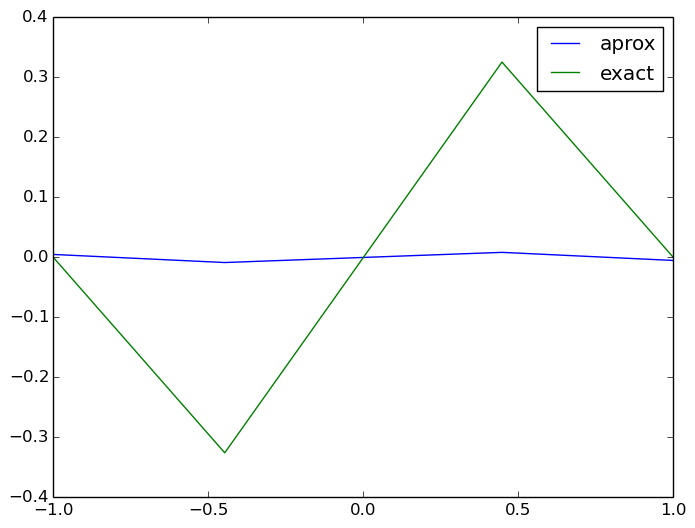

PyObject <matplotlib.legend.Legend object at 0x7fc9e7b75210>

In [118]:

plot(z,uh',label="aprox")
plot(z,fun(remap(zglj(Nel+1),a,b)),label="exact")
legend()